<a href="https://colab.research.google.com/github/MunnaGITAM/Rohit_INFO5731_SPRING2022/blob/main/In_class_exercise_05_2_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 04/12/2022)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from here: https://github.com/unt-iialab/info5731-spring2022/blob/main/assignments/exercise05_datacollection.zip. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [ ]:
# Write your code here

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
import pandas as pd
import nltk
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, KFold, cross_val_score
from xgboost import XGBClassifier
train_df = pd.read_csv(r'/content/stsa-train.txt',sep = 'delimiter=',header= None,names=['Text'])
train_df[['Sentiment','Text']] = train_df["Text"].str.split(" ", 1, expand=True)
test_df = pd.read_csv(r'/content/stsa-test.txt',sep = 'delimiter=',header= None,names=['Text'])
test_df[['Sentiment','Text']] = test_df["Text"].str.split(" ", 1, expand=True)
train_df.head()





/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


,Text,Sentiment
0,"a stirring , funny and finally transporting re...",1
1,apparently reassembled from the cutting-room f...,0
2,they presume their audience wo n't sit still f...,0
3,this is a visually stunning rumination on love...,1
4,jonathan parker 's bartleby should have been t...,1


In [ ]:
import nltk
import re
import string
nltk.download('stopwords')
nltk.download('wordnet')
stopword=nltk.corpus.stopwords.words('english')
from nltk.stem import WordNetLemmatizer
wl= WordNetLemmatizer()
def clean_text(data):
  data="".join([word.lower() for word in data if word not in string.punctuation])
  data = re.sub("^\d+\s|\s\d+\s|\s\d+$", " ", data)
  tokens = re.split('\W+',data)
  data = [wl.lemmatize(word) for word in tokens if word not in stopword]
  return data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(train_df['Text'])
print(X_tfidf.shape)
X_tfidf_df=pd.DataFrame(X_tfidf.toarray())
X_tfidf_df.columns=tfidf_vect.get_feature_names()
X_test_tfidf = tfidf_vect.transform(test_df['Text'])
print(X_test_tfidf.shape)

(6920, 13343)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


(1821, 13343)


In [ ]:
#Algorithms
#(1) MultinominalNB
mnb = MultinomialNB()
#(2) SVM
svm = LinearSVC()
#(3) KNN
knn = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)
#(4) Decision tree
dt = DecisionTreeClassifier()
#(5) Random Forest
rf = RandomForestClassifier()
#(6) XGBoost
xgb = XGBClassifier()

#split the data
x_train, x_test, y_train, y_test = train_test_split(X_tfidf_df, train_df['Sentiment'].values,
                                                test_size=0.2, random_state=42)
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
def cross_validation_score(modelName, x, y):
  scoring = 'accuracy'
  kfold = KFold(10, random_state = 7,shuffle=True)
  cross_val = cross_val_score(modelName, x, y, cv=kfold).mean()
  return cross_val

In [ ]:
#(1) MultinominalNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
mnb_test = mnb.fit(x_train,y_train)
y_mnb = mnb_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_mnb,y_test))
print(classification_report(y_test,y_mnb))
from sklearn.model_selection import cross_val_score
scores_MNB = cross_val_score(mnb, x_test, y_test, cv=10)
kfold = KFold(10, random_state = 7, shuffle=True)
print("Accuracy with MNB",scores_MNB.mean())
mnb_scores_mean = cross_validation_score(mnb,x_test,y_test)
print('MNB Cross Validation Score is {0}'.format(mnb_scores_mean))
test_predicted_mnb = mnb.predict(x_test)
test_accuracy_mnb = round(accuracy_score(test_predicted_mnb, y_test),4)*100
print("Testing Data")
print("Accuracy - ", test_accuracy_mnb)
print(classification_report(y_test, test_predicted_mnb))

Accuracy Score 0.7955202312138728
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384

Accuracy with MNB 0.7247054530288813
MNB Cross Validation Score is 0.7138828067980398
Testing Data
Accuracy -  79.55
              precision    recall  f1-score   support

           0       0.85      0.70      0.77       671
           1       0.76      0.88      0.82       713

    accuracy                           0.80      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.80      0.80      0.79      1384



In [ ]:
#(2) SVM
svm_test = svm.fit(x_train,y_train)
y_svm = svm_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_svm,y_test))
print(classification_report(y_test,y_svm))
from sklearn.model_selection import cross_val_score
scores_SVM = cross_val_score(svm, x_test, y_test, cv=10)
print("Accuracy with SVM",scores_SVM.mean())
svm_scores_mean = cross_validation_score(svm, x_test,y_test)
print('SVM Cross Validation Score is {0}'.format(svm_scores_mean))
test_predicted_svm = svm.predict(x_test)
test_accuracy_svm = round(accuracy_score(test_predicted_svm, y_test),4)*100
print("Testing Data")
print("Accuracy - ", test_accuracy_svm)
print(classification_report(y_test, test_predicted_svm))

Accuracy Score 0.791907514450867
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384

Accuracy with SVM 0.7348034615785632
SVM Cross Validation Score is 0.7348451673443853
Testing Data
Accuracy -  79.19
              precision    recall  f1-score   support

           0       0.81      0.75      0.78       671
           1       0.78      0.83      0.80       713

    accuracy                           0.79      1384
   macro avg       0.79      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
#(3)KNN Model
knn_test = knn.fit(x_train,y_train)
y_knn = knn_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_knn,y_test))
print(classification_report(y_test,y_knn))
from sklearn.model_selection import cross_val_score
scores_KNN = cross_val_score(knn, x_test, y_test, cv=10)
print("Accuracy with knn",scores_KNN.mean())
knn_scores_mean = cross_validation_score(knn, x_test,y_test)
print('KNN Cross Validation Score is {0}'.format(knn_scores_mean))
test_predicted_knn = knn.predict(x_test)
test_accuracy_knn = round(accuracy_score(test_predicted_knn, y_test),4)*100
print("Testing Data")
print("Accuracy - ", test_accuracy_knn)
print(classification_report(y_test, test_predicted_knn))

Accuracy Score 0.740606936416185
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384

Accuracy with knn 0.6675737670732979
KNN Cross Validation Score is 0.6669325409237826
Testing Data
Accuracy -  74.06
              precision    recall  f1-score   support

           0       0.75      0.71      0.73       671
           1       0.74      0.77      0.75       713

    accuracy                           0.74      1384
   macro avg       0.74      0.74      0.74      1384
weighted avg       0.74      0.74      0.74      1384



In [ ]:
#(4) Decision tree
des_tree_test = dt.fit(x_train,y_train)
y_des_tree = des_tree_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_des_tree,y_test))
print(classification_report(y_test,y_des_tree))
scores_DT = cross_val_score(dt, x_test, y_test, cv=10)
print("Accuracy obtained with Decision trees",scores_DT.mean())
dt_scores_mean = cross_validation_score(dt, x_test,y_test)
print('Decision Tree obtained Cross Validation Score is {0}'.format(dt_scores_mean))
test_predicted_dt = dt.predict(x_test)
test_accuracy_dt = round(accuracy_score(test_predicted_dt, y_test),4)*100
print("Testing Data")
print("Accuracy - ", test_accuracy_dt)
print(classification_report(y_test, test_predicted_dt))

Accuracy Score 0.6488439306358381
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       671
           1       0.65      0.69      0.67       713

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384

Accuracy obtained with Decision trees 0.607585236158899
Decision Tree obtained Cross Validation Score is 0.6033468877072256
Testing Data
Accuracy -  64.88000000000001
              precision    recall  f1-score   support

           0       0.65      0.60      0.62       671
           1       0.65      0.69      0.67       713

    accuracy                           0.65      1384
   macro avg       0.65      0.65      0.65      1384
weighted avg       0.65      0.65      0.65      1384



In [ ]:
#(5) Random Forest
rf_test = rf.fit(x_train,y_train)
y_rf = rf_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_rf,y_test))
print(classification_report(y_test,y_rf))
scores_RF = cross_val_score(rf, x_test, y_test, cv=10)
print("Accuracy obtained with Random Forest",scores_RF.mean())
rf_scores_mean = cross_validation_score(rf, x_test,y_test)
print('Random Forest obtained Cross Validation Score is {0}'.format(rf_scores_mean))
test_predicted_rf = rf.predict(x_test)
test_accuracy_rf = round(accuracy_score(test_predicted_rf, y_test),4)*100
print("Testing Data")
print("Accuracy - ", test_accuracy_rf)
print(classification_report(y_test, test_predicted_rf))

Accuracy Score 0.7442196531791907
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       671
           1       0.72      0.83      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384

Accuracy obtained with Random Forest 0.6733604420811177
Random Forest obtained Cross Validation Score is 0.6770044833698259
Testing Data
Accuracy -  74.42
              precision    recall  f1-score   support

           0       0.78      0.65      0.71       671
           1       0.72      0.83      0.77       713

    accuracy                           0.74      1384
   macro avg       0.75      0.74      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [ ]:
#(6) XGBoost
xgb_test = xgb.fit(x_train,y_train)
y_xgb = xgb_test.predict(x_test)
print('Accuracy Score %s' % accuracy_score(y_xgb,y_test))
print(classification_report(y_test,y_xgb))
scores_XGB = cross_val_score(xgb, x_test, y_test, cv=10)
print("Accuracy with XGBoost",scores_XGB.mean())
xgb_scores_mean = cross_validation_score(xgb, x_test,y_test)
print('XGBoost Cross Validation Score is {0}'.format(xgb_scores_mean))
test_predicted_xgb = xgb.predict(x_test)
test_accuracy_xgb = round(accuracy_score(test_predicted_xgb, y_test),4)*100
print("Testing Data")
print("Accuracy - ", test_accuracy_xgb)
print(classification_report(y_test, test_predicted_xgb))

Accuracy Score 0.6445086705202312
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384

Accuracy with XGBoost 0.6184704410384736
XGBoost Cross Validation Score is 0.614211239703889
Testing Data
Accuracy -  64.45
              precision    recall  f1-score   support

           0       0.75      0.40      0.52       671
           1       0.61      0.88      0.72       713

    accuracy                           0.64      1384
   macro avg       0.68      0.64      0.62      1384
weighted avg       0.68      0.64      0.62      1384



In [ ]:
print("Accuracy  with MNB",scores_MNB.mean())
print("Accuracy  with SVM",scores_SVM.mean())
print("Accuracy  with knn",scores_KNN.mean())
print("Accuracy  with Decision trees",scores_DT.mean())
print("Accuracy  with Random Forest",scores_RF.mean())
print("Accuracy  with XGBoost",scores_XGB.mean())

Accuracy  with MNB 0.7247054530288813
Accuracy  with SVM 0.7348034615785632
Accuracy  with knn 0.6675737670732979
Accuracy  with Decision trees 0.607585236158899
Accuracy  with Random Forest 0.6733604420811177
Accuracy  with XGBoost 0.6184704410384736


In [ ]:
predict_svm = svm_test.predict(X_test_tfidf)
print('High accuracy final model trained(SVM) evaluated on the test data: %s' % accuracy_score(predict_svm,test_df['Sentiment']))

High accuracy final model trained(SVM) evaluated on the test data: 0.7891268533772653


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  "X does not have valid feature names, but"


(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K means, 
DBSCAN,
Hierarchical clustering. 

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [3]:
#Write your code here.
import pandas as pd
df = pd.read_csv("/content/Rohit_Amazon_Unlocked_Mobile.csv")
df.head(100)



,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0
...,...,...,...,...,...,...
95,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,5,very well,0.0
96,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,1,Cannot connect to GSM network,0.0
97,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"This cell phone exceeded my expectations, it's...",1.0
98,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.00,4,"pros.. it works fine, its easy to use, not too...",1.0


In [4]:
# Text Preprocessing
df['Text'] = df['Reviews'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
df['Text'] = df['Text'].str.replace('[^\w\s]','')
from textblob import Word
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
stop = stopwords.words('english')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  This is separate from the ipykernel package so we can avoid doing imports until


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [5]:
df['Text'].head(10)

0    feel lucky found used phone u used hard phone ...
1    nice phone nice grade pantach revue clean set ...
2                                              pleased
3          work good go slow sometimes good phone love
4    great phone replace lost phone thing volume bu...
5    already phone problem know stated used dang st...
6    charging port loose got soldered needed new ba...
7    phone look good wouldnt stay charged buy new b...
8    originally using samsung s2 galaxy sprint want...
9    battery life great responsive touch issue some...
Name: Text, dtype: object

In [6]:
# TF-IDF 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['Text'].values)

In [7]:
# K Means
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 9,init='k-means++', max_iter=10000, random_state=50)
model.fit(tfidf_vects)
from collections import Counter
Counter(model.labels_)

Counter({0: 11589,
         1: 6112,
         2: 181133,
         3: 17213,
         4: 15841,
         5: 163558,
         6: 2551,
         7: 9221,
         8: 6622})

In [8]:
labels = model.labels_
cluster_center=model.cluster_centers_
cluster_center

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.31014554e-06, 5.52080515e-06, 4.02183142e-06, ...,
        5.41501054e-06, 1.94193108e-06, 4.32056408e-06],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [9]:
#DBSCAN
Text_reviews=[]
for i in df['Text']:
  Text_reviews.append(i.split())
import gensim
w2v_model=gensim.models.Word2Vec(Text_reviews, size=100, workers=4)

In [10]:
import numpy as np
vectors = []
for i in Text_reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


In [11]:
from sklearn.cluster import DBSCAN
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

In [12]:
def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()
    
    return dists[199]

In [13]:
vectors.shape

(413840, 100)

In [14]:
neighbor = []
for val in vectors[:300]:
    neighbor.append(compute200thnearestneighbour(val, vectors[:300]))
neighbor.sort()

In [15]:
%matplotlib inline
from matplotlib import pyplot as plt

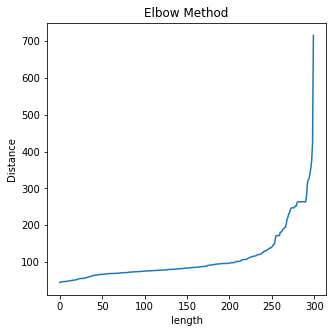

In [16]:
# Plotting for the Elbow Method :
plt.figure(figsize=(5,5))
plt.title("Elbow Method")
plt.plot([x for x in range(len(neighbor))], neighbor)
plt.xlabel("length")
plt.ylabel("Distance")
plt.show()

In [ ]:
#Hierarchical clustering
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(vectors,method='ward'))
plt.axhline(y=20)

In one paragraph, please compare K means, DBSCAN and Hierarchical clustering.

In [ ]:
Using clustering in Unsupervised Machine Learning, all the data points are grouped into one cluster based on the amount of similarity in the dataset.
Clustering is referred to as K. All the data points in a sample space are partitioned into K groups of similarity using this algorithm.
Euclidian Distance is commonly used to measure similarity.

DBSCAN: As the name suggests, this algorithm uses density based clustering, which means that each point within a given radius (R) must have at least one other point in it (M).

Detecting outliers and dealing with noise has proven to be extremely effective with this algorithm.

Using Heirarchial Clustering, all of the similar objects were grouped into distinct clusters that were distinct from one another. The following is how Heirarchical Clustering works:



Each observation is treated as a distinct cluster in hierarchical clustering. Afterwards, it repeatedly performs the next two steps: In order to merge the two clusters that are the most similar, you first need to identify the two clusters that are closest together.

All clusters must be combined in this iterative process.


